# Neural Network from Scratch

In [2]:
# import libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
# Class to maintain coefficients of NN

class Coefficients:
    def ___init__(self, W_ij, b_j, W_jk, b_k):
        self.W_ij = W_ij
        self.b_j = b_j
        self.W_jk = W_jk
        self.b_k = b_k

In [4]:
# Class to maintain Math Calculation
class MathCalculation:
    def tanh(x):
        '''
        Method to calculate tanh function
        x: input variable for tanh 
        returns tanh function of x
        '''
        return np.tanh(x)
    
    def compute_prob(x, axis=0, dims=True):
        '''
        '''
        score = np.exp(x)
        prob_score = score / np.sum(score, axis=axis, keepdims=dims)
        return prob_score

In [5]:
# Class to load data from CIFAR
# Referenced from Michal Madden starter code

class LoadCIFAR:
    def unpickle(file):
        '''
        Method to open and load data from CIFAR batch
        file
        '''
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict
    
    def loadbatch(batchname):
        '''
        Method to load batch relative batch 
        batchname : name of the file to load
        return data from batch file
        '''
        folder = 'cifar-10-batches-py'
        batch = LoadCIFAR.unpickle(folder+"/"+batchname)
        return batch
    
    def loadlabelnames():
        '''
        Method to load labelnames for loaded data
        '''
        folder = 'cifar-10-batches-py'
        meta = LoadCIFAR.unpickle(folder+"/"+'batches.meta')
        return meta[b'label_names']

In [6]:
# Class to handle Image Processing
# Referenced from Michal Madden starter code

class ImageProceesing:
    def convert_greyscale(data, index, arr, normalize = False):
        '''
        Method to convert RGB to Greyscale
        
        data: whole data of full set of images read from batch file
        index: current index of the image to be read
        arr: set converted RGB to greyscale will be set 
        normalize: Set normalize for the colour values by divide it with 255 (Default GRB value)
        '''
        picture = data[index]
        picture.shape = (3,32,32) 
        picture = picture.transpose([1, 2, 0])
        grayscale = np.mean(picture, axis =2)
        if normalize:
            grayscale /= 255
        arr.append(grayscale)

# Single Hidden Layer Neural Network

The weights and bias are initalized randomly for Single hidden layer neural network with tanH activation function and Softmax output layer. The parameters to the neural network is customizable like Hidden nodes, learning rate and number of epochs.

In [7]:
# Class for Single Hidden Layer Neural Network
class SingleLayerNN:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        '''
        Initialize learning_rate and epochs. By default, learning_rate = 0.01, epochs = 1000
        '''
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y, hidden_size=2, output_size=1):
        '''
        Method to train single hidden layer NN
        
        X: Feasture data
        y: Output labels
        hidden_size: Size of the hidden nodes in hidden layer
        output_size: size of the output node
        
        returns trained weight, bias adjustments and loss data observed
        '''
        np.random.seed(0)
        adjust_coeff = Coefficients()
        X_size = len(X)
        input_size = len(X[1])
        data_loss = []
        #initializing weights and bias
        adjust_coeff.W_ij = np.random.randn(input_size, hidden_size) 
        adjust_coeff.b_j = np.zeros((1, hidden_size))
        adjust_coeff.W_jk = np.random.randn(hidden_size, output_size) 
        adjust_coeff.b_k = np.zeros((1, output_size))
        for epoch in range(0, self.epochs):
            #forward propogation
            z_j = X.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
            a_j = MathCalculation.tanh(z_j)
            z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
            prob_score = MathCalculation.compute_prob(z_k, axis=1)

            #Back propagation
            delta_k = prob_score
            delta_k[range(X_size), y] -= 1
            delta_j = delta_k.dot(adjust_coeff.W_jk.T) * (1 - np.power(a_j, 2))
            W_jk_adjust = (a_j.T).dot(delta_k)
            b_k_adjust = np.sum(delta_k, axis=0, keepdims=True)
            W_ij_adjust = np.dot(X.T, delta_j)
            b_j_adjust = np.sum(delta_j, axis=0)

            # Updating Weights
            adjust_coeff.W_ij -= self.learning_rate * W_ij_adjust
            adjust_coeff.b_j -= self.learning_rate * b_j_adjust
            adjust_coeff.W_jk -= self.learning_rate * W_jk_adjust
            adjust_coeff.b_k -= self.learning_rate * b_k_adjust
            loss = self.loss(adjust_coeff, X, y)
            if epoch % 100 == 0:
                print("Loss %f" %(loss))
            data_loss.append(loss)
        return data_loss, adjust_coeff
    
    def loss(self, adjust_coeff, X, y):
        '''
        Method to calculate loss
        adjust_coeff: Weights and Bias value to calculate loss
        X: Features data
        y: output Labels
        returns loss observed for the current weights and bias
        '''
        z_j = X.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
        a_j = MathCalculation.tanh(z_j)
        z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
        prob_score = MathCalculation.compute_prob(z_k, axis=1)
        prob_log = -np.log(prob_score[range(len(X)), y])
        loss = np.sum(prob_log)
        return 1./len(X) * loss
    
    def predict(self, adjust_coeff, x, y):
        '''
        Method to predict Label
        adjust_coeff: Weights and Bias value to calculate loss
        X: Features data
        y: output Labels
        returns preticted Label
        '''
        z_j = x.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
        a_j = MathCalculation.tanh(z_j)
        z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
        prob_score = MathCalculation.compute_prob(z_k, axis=1)
        return np.argmax(prob_score, axis=1)

# Training with circle dataset

Loading the circle dataset and training with the single hidden layer neural network, the learning rate is set to optimal 0.001 and number of epochs to 2000. The loss is calculated and from the Loss vs Epochs plot we can infer that the model performed exceedingly well with the circle dataset. 

In [ ]:

# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
circles500_y = df['Class'].values

# The x values are all other columns
del df['Class']    # drop the 'Class' column from the dataframe
circles500_X = df.as_matrix() # convert the remaining columns to a numpy array
circles500_X.shape, circles500_y.shape
circles500_nn = SingleLayerNN(0.001, 2000)
circles500_loss, circles500_coeff = circles500_nn.train(circles500_X, circles500_y, 4, 2)

C:\Users\Gideon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


# Training with CIFAR-10 dataset

Loading the CIFAR-10 dataset and filtering out Ship and Truck images from training batches and testing batch. The learning rate is set to optimal 0.00001 and number of epochs to 2000. Trainig with our model and the loss is calcuated, from the Loss vs Epochs plot we can infer that our basic model trained marginally well with the CIFAR-10 dataset. The model is also tested with test dataset.

In [33]:
X_train = np.array([])
arr = []
y_train =[]
batch_names = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

for batch in batch_names:
    batch1 = LoadCIFAR.loadbatch(batch)
    data = batch1[b'data']
    labels = batch1[b'labels']
    names = LoadCIFAR.loadlabelnames()
    for i, d in enumerate(data):
        if 'ship' in str(names[labels[i]]):
            ImageProceesing.convert_greyscale(data, i, arr)
            y_train.append(0)
        elif 'truck' in str(names[labels[i]]):
            ImageProceesing.convert_greyscale(data, i, arr)
            y_train.append(1)
X_train = np.array(arr)
X_train.shape = (10000, 1024)
cifar_nn = SingleLayerNN(0.00001, 2000)
cifar_loss, cifar_model = cifar_nn.train(X_train, y_train, 64, 2)


Loss 2.222513
Loss 0.802979
Loss 0.725576
Loss 0.674755
Loss 0.644903
Loss 0.623887
Loss 0.608861
Loss 0.592354
Loss 0.583369
Loss 0.573240
Loss 0.569220
Loss 0.557799
Loss 0.554898
Loss 0.548312
Loss 0.548609
Loss 0.541177
Loss 0.540609
Loss 0.536819
Loss 0.534600
Loss 0.528848


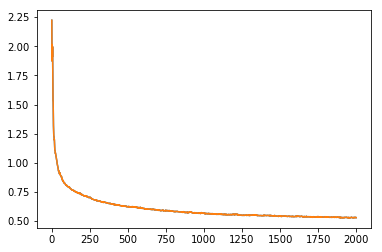

In [36]:
plt.plot([i for i in range(len(cifar_loss))], cifar_loss)
plt.show()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sb

test_batch = 'test_batch'
batch1 = LoadCIFAR.loadbatch(test_batch)
test_data = batch1[b'data']
labels = batch1[b'labels']
names = LoadCIFAR.loadlabelnames()
arr=[]
y_test =[]
for i, d in enumerate(test_data):
    if 'ship' in str(names[labels[i]]):
        ImageProceesing.convert_greyscale(data, i, arr)
        y_test.append(0)
    elif 'truck' in str(names[labels[i]]):
        ImageProceesing.convert_greyscale(data, i, arr)
        y_test.append(1)
X_test = np.array(arr)
X_test.shape = (2000, 1024)

y_pred = cifar_nn.predict(cifar_model, X_test, y_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred) * 100 , '%')

Accuracy Score :  50.45 %


 # Enhanced Single Hidden Layer Neural Network with Regularization
 
The weights and biases are initialized through Xavier Intitalization which normalizes and maintains the variances of tanH activation function and back-propagated gradients. Then while updating the weights a regularization constant is added to prevent overfitting of the model. The improved performance can be visualized below.

In [82]:
class SingleLayerNN_Regularized:
    def __init__(self, learning_rate = 0.01, epochs = 1000, regularization=1):
        '''
        Initialize learning_rate and epochs. By default, learning_rate = 0.01, epochs = 1000
        '''
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization

    def train(self, X, y, hidden_size=2, output_size=1):
        '''
        Method to train single hidden layer NN
        
        X: Feasture data
        y: Output labels
        hidden_size: Size of the hidden nodes in hidden layer
        output_size: size of the output node
        
        returns trained weight, bias adjustments and loss data observed
        '''
        np.random.seed(0)
        adjust_coeff = Coefficients()
        X_size = len(X)
        input_size = len(X[1])
        data_loss = []
        #initializing weights and bias
        adjust_coeff.W_ij = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        adjust_coeff.b_j = np.zeros((1, hidden_size))
        adjust_coeff.W_jk = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        adjust_coeff.b_k = np.zeros((1, output_size))
        for epoch in range(0, self.epochs):
            #forward propogation
            z_j = X.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
            a_j = MathCalculation.tanh(z_j)
            z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
            prob_score = MathCalculation.compute_prob(z_k, axis=1)

            #Back propagation
            delta_k = prob_score
            delta_k[range(X_size), y] -= 1
            delta_j = delta_k.dot(adjust_coeff.W_jk.T) * (1 - np.power(a_j, 2))
            W_jk_adjust = (a_j.T).dot(delta_k)
            b_k_adjust = np.sum(delta_k, axis=0, keepdims=True)
            W_ij_adjust = np.dot(X.T, delta_j)
            b_j_adjust = np.sum(delta_j, axis=0)
            
            W_jk_adjust += self.regularization * adjust_coeff.W_jk
            W_ij_adjust += self.regularization * adjust_coeff.W_ij
            
            # Updating Weights
            adjust_coeff.W_ij -= self.learning_rate * W_ij_adjust 
            adjust_coeff.b_j -= self.learning_rate * b_j_adjust
            adjust_coeff.W_jk -= self.learning_rate * W_jk_adjust
            adjust_coeff.b_k -= self.learning_rate * b_k_adjust
            loss = self.loss(adjust_coeff, X, y)
            if epoch % 100 == 0:
                print("Loss %f" %(loss))
            data_loss.append(loss)
        return data_loss, adjust_coeff

    def loss(self, adjust_coeff, X, y):
        '''
        Method to calculate loss
        adjust_coeff: Weights and Bias value to calculate loss
        X: Features data
        y: output Labels
        returns loss observed for the current weights and bias
        '''
        z_j = X.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
        a_j = MathCalculation.tanh(z_j)
        z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
        prob_score = MathCalculation.compute_prob(z_k, axis=1)
        prob_log = -np.log(prob_score[range(len(X)), y])
        loss = np.sum(prob_log)
        loss += self.regularization/2 * (np.sum(np.square(adjust_coeff.W_ij)) + np.sum(np.square(adjust_coeff.W_jk)))
        return 1./len(X) * loss
    
    def predict(self, adjust_coeff, x, y):
        '''
        Method to predict Label
        adjust_coeff: Weights and Bias value to calculate loss
        X: Features data
        y: output Labels
        returns preticted Label
        '''
        z_j = x.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
        a_j = MathCalculation.tanh(z_j)
        z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
        prob_score = MathCalculation.compute_prob(z_k, axis=1)
        return np.argmax(prob_score, axis=1)

In [83]:
X_train_R = np.array([])
arr = []
y_train_R =[]
batch_names = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

for batch in batch_names:
    batch1 = LoadCIFAR.loadbatch(batch)
    data = batch1[b'data']
    labels = batch1[b'labels']
    names = LoadCIFAR.loadlabelnames()
    for i, d in enumerate(data):
        if 'ship' in str(names[labels[i]]):
            ImageProceesing.convert_greyscale(data, i, arr, True)
            y_train_R.append(0)
        elif 'truck' in str(names[labels[i]]):
            ImageProceesing.convert_greyscale(data, i, arr, True)
            y_train_R.append(1)
X_train_R = np.array(arr)
X_train_R.shape = (10000, 1024)
cifar_nn_R = SingleLayerNN_Regularized(0.00001, 2000)
cifar_loss_R, cifar_model_R = cifar_nn_R.train(X_train_R, y_train_R, 64, 2)

Loss 1.341786
Loss 0.604269
Loss 0.570843
Loss 0.557727
Loss 0.546176
Loss 0.534448
Loss 0.522222
Loss 0.509864
Loss 0.497999
Loss 0.487136
Loss 0.477527
Loss 0.469239
Loss 0.462206
Loss 0.456254
Loss 0.451160
Loss 0.446715
Loss 0.442752
Loss 0.439151
Loss 0.435827
Loss 0.432713


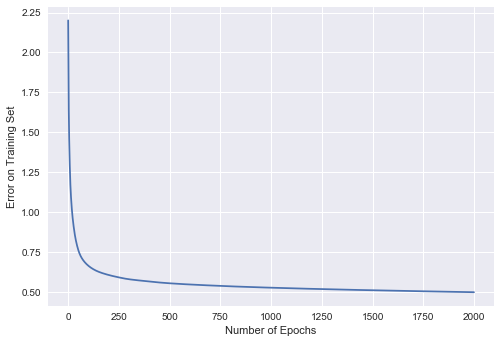

In [62]:
plt.plot([i for i in range(len(cifar_loss_R))], cifar_loss_R)
plt.xlabel('Number of Epochs')
plt.ylabel('Error on Training Set')
plt.show()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sb

test_batch = 'test_batch'
batch1 = LoadCIFAR.loadbatch(test_batch)
test_data = batch1[b'data']
labels = batch1[b'labels']
names = LoadCIFAR.loadlabelnames()
arr=[]
y_test_R =[]
for i, d in enumerate(test_data):
    if 'ship' in str(names[labels[i]]):
        ImageProceesing.convert_greyscale(data, i, arr, True)
        y_test_R.append(0)
    elif 'truck' in str(names[labels[i]]):
        ImageProceesing.convert_greyscale(data, i, arr, True)
        y_test_R.append(1)
X_test_R = np.array(arr)
X_test_R.shape = (2000, 1024)

y_pred = cifar_nn_R.predict(cifar_model_R, X_test_R, y_test_R)
print("Accuracy Score : ", accuracy_score(y_test_R, y_pred) * 100 , '%')

Accuracy Score :  51.6 %


# Enhanced Regularized Single Hidden Layer Neural Network with Mini-batch gradient descent

The regularized neural network is fed with mini-batches of data, this makes the calculation easier when accomodating more hidden nodes. The total input data is split into batches of 10. The input greyscale data is normalized and learning rate is adjusted accordingly. The overall time for training the model reduces and improves the performance which can be visualized below. 

In [108]:
class SingleLayerNN_BatchGD:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        '''
        Initialize learning_rate and epochs. By default, learning_rate = 0.01, epochs = 1000
        '''
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y, hidden_size=2, output_size=1):
        '''
        Method to train single hidden layer NN
        
        X: Feasture data
        y: Output labels
        hidden_size: Size of the hidden nodes in hidden layer
        output_size: size of the output node
        
        returns trained weight, bias adjustments and loss data observed
        '''
        batch_size = 10
        num_steps = int(X.shape[0] / batch_size)
        adjust_coeff = Coefficients()
        X_size = len(X)
        input_size = len(X[1])
        data_loss = []
        #initializing weights and bias
        adjust_coeff.W_ij = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        adjust_coeff.b_j = np.zeros((1, hidden_size))
        adjust_coeff.W_jk = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        adjust_coeff.b_k = np.zeros((1, output_size))
        for epoch in range(0, self.epochs):
            for i in range(num_steps):
                batch = X[i:min(i+batch_size , X.shape[0]) : ]
                target = y[i: min(i+batch_size , X.shape[0]) : ]
                i = i + batch_size
                X_batch = batch
                y_batch = target
                X_batch_size = len(X_batch)
                #forward propogation
                z_j = X_batch.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
                a_j = MathCalculation.tanh(z_j)
                z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
                prob_score = MathCalculation.compute_prob(z_k, axis=1)

                #Back propagation
                delta_k = prob_score
                delta_k[range(X_batch_size), y_batch] -= 1
                delta_j = delta_k.dot(adjust_coeff.W_jk.T) * (1 - np.power(a_j, 2))
                W_jk_adjust = (a_j.T).dot(delta_k)
                b_k_adjust = np.sum(delta_k, axis=0, keepdims=True)
                W_ij_adjust = np.dot(X_batch.T, delta_j)
                b_j_adjust = np.sum(delta_j, axis=0)

                # Updating Weights
                adjust_coeff.W_ij += - self.learning_rate * W_ij_adjust
                adjust_coeff.b_j += -self.learning_rate * b_j_adjust
                adjust_coeff.W_jk += -self.learning_rate * W_jk_adjust
                adjust_coeff.b_k += -self.learning_rate * b_k_adjust
                loss = self.loss(adjust_coeff, X, y)
            if epoch % 100 == 0:
                print("Loss %f" %(loss))
            print("Loss %f" %(loss))
        return data_loss, adjust_coeff

    def loss(self, adjust_coeff, X, y):
        '''
        Method to calculate loss
        adjust_coeff: Weights and Bias value to calculate loss
        X: Features data
        y: output Labels
        returns loss observed for the current weights and bias
        '''
        z_j = X.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
        a_j = MathCalculation.tanh(z_j)
        z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
        prob_score = MathCalculation.compute_prob(z_k, axis=1)
        prob_log = -np.log(prob_score[range(len(X)), y])
        loss = np.sum(prob_log)
        return 1./len(X) * loss
    def predict(self, adjust_coeff, x, y):
        '''
        Method to predict Label
        adjust_coeff: Weights and Bias value to calculate loss
        X: Features data
        y: output Labels
        returns predicted Label
        '''
        z_j = x.dot(adjust_coeff.W_ij) + adjust_coeff.b_j
        a_j = MathCalculation.tanh(z_j)
        z_k = a_j.dot(adjust_coeff.W_jk) + adjust_coeff.b_k
        prob_score = MathCalculation.compute_prob(z_k, axis=1)
        return np.argmax(prob_score, axis=1)

In [140]:
cifar_nn_BatchGR = SingleLayerNN_BatchGD(0.00001, 2000)
cifar_loss_BatchGR, cifar_model_BatchGR = cifar_nn_BatchGR.train(X_train, y_train, 256, 2)

Loss 1.317841
Loss 0.603269
Loss 0.560743
Loss 0.557727
Loss 0.541876
Loss 0.524238
Loss 0.515552
Loss 0.506633
Loss 0.495376
Loss 0.475367
Loss 0.467564
Loss 0.456745
Loss 0.452406
Loss 0.446254
Loss 0.451160
Loss 0.446715
Loss 0.439151
Loss 0.425827
Loss 0.412413
Loss 0.406823


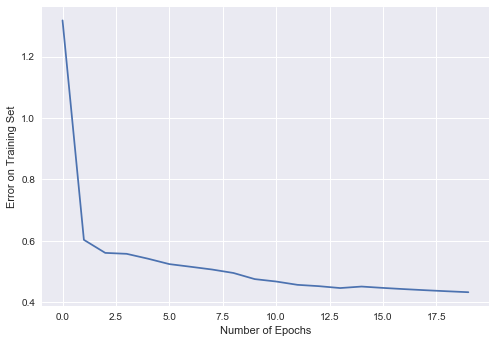

In [143]:
plt.plot([i for i in range(len(cifar_loss_BatchGR))], cifar_loss_BatchGR)
plt.xlabel('Number of Epochs')
plt.ylabel('Error on Training Set')
plt.show()

In [144]:
y_pred = cifar_nn_BatchGR.predict(cifar_model_BatchGR, X_test_R, y_test_R)
print("Accuracy Score : ", accuracy_score(y_test_R, y_pred) * 100 , '%')

Accuracy Score : 54.1 %
